In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import datetime

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
BTC = pd.read_csv('BTC_train.csv')
testBTC = pd.read_csv('BTC_test.csv')

In [6]:
BTC['log_ret'] = np.log(BTC.close) - np.log(BTC.close.shift(1))
testBTC['log_ret'] = np.log(testBTC.close) - np.log(testBTC.close.shift(1))

BTC['n5_sd'] = BTC['close'].rolling(5).std(ddof=1).shift(-5)
testBTC['n5_sd'] = testBTC['close'].rolling(5).std(ddof=1).shift(-5)

BTC['n10_sd'] = BTC['close'].rolling(10).std(ddof=1).shift(-10)
testBTC['n10_sd'] = testBTC['close'].rolling(10).std(ddof=1).shift(-10)

BTC['n20_sd'] = BTC['close'].rolling(20).std(ddof=1).shift(-20)
testBTC['n20_sd'] = testBTC['close'].rolling(20).std(ddof=1).shift(-20)

BTC['n30_sd'] = BTC['close'].rolling(30).std(ddof=1).shift(-30)
testBTC['n30_sd'] = testBTC['close'].rolling(30).std(ddof=1).shift(-30)

BTC

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,SMA_20,SMA_60,RSI,log_ret,n5_sd,n10_sd,n20_sd,n30_sd
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,28519.3540,28650.364333,58.451852,NaN,31.413174,108.271401,102.425398,99.048277
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,28536.3845,28644.548500,58.720242,0.000165,17.101093,116.419081,100.201088,100.724233
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,28561.6520,28638.428667,53.156234,-0.002486,56.760266,114.972900,98.961488,104.250880
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,28585.1790,28633.124833,54.504338,0.000723,83.064195,105.568031,96.578699,111.343180
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,28604.8735,28627.540667,55.513597,0.000529,96.347026,91.885585,93.121995,117.204367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,34516.4125,34658.780333,32.301918,-0.000683,NaN,NaN,NaN,NaN
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,34489.3265,34647.939167,31.019205,-0.000963,NaN,NaN,NaN,NaN
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,34460.3260,34637.647833,37.223747,0.002224,NaN,NaN,NaN,NaN
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,34434.1240,34629.811167,35.903240,-0.000844,NaN,NaN,NaN,NaN


In [7]:
redditDataTrain_flair = pd.read_pickle('redditDataTrainF.pkl')

In [7]:
redditDataTrain_vadar = pd.read_pickle('redditDataTrain_vader.pkl')

In [8]:
redditDataTrain_transformer = pd.read_pickle('redditDataTrain_transformer.pkl')

In [80]:
redditDataTrain_vadar

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,compound,sentiment
613,1,"I'm sorry, but I set a reminder, and this hurt...",1.609451e+09,2020-12-31,21:41:44,2020-12-31 21:41:44,2020-12-31 21:44:59.999,2020-12-31 21:59:59.999,2020-12-31 21:59:59.999,-0.7259,NEGATIVE
720,1,Unlikely,1.612948e+09,2021-02-10,09:06:05,2021-02-10 09:06:05,2021-02-10 09:09:59.999,2021-02-10 09:29:59.999,2021-02-10 09:59:59.999,0.0000,NEUTRAL
1052,2,Thank you (sincerely) -- this comment saved me...,1.609866e+09,2021-01-05,17:04:34,2021-01-05 17:04:34,2021-01-05 17:04:59.999,2021-01-05 17:29:59.999,2021-01-05 17:59:59.999,0.8126,POSITIVE
1210,2,Cheers. Happy to be helpful.,1.609868e+09,2021-01-05,17:38:03,2021-01-05 17:38:03,2021-01-05 17:39:59.999,2021-01-05 17:59:59.999,2021-01-05 17:59:59.999,0.8625,POSITIVE
2857,2,Thank you! Very cool of you. I also managed to...,1.609389e+09,2020-12-31,04:25:04,2020-12-31 04:25:04,2020-12-31 04:29:59.999,2020-12-31 04:29:59.999,2020-12-31 04:59:59.999,0.6885,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999,0.0000,NEUTRAL
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999,0.8911,POSITIVE
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999,0.7184,POSITIVE
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,-0.4019,NEGATIVE


In [85]:
redditDataTrain_vadar.iloc[0].created_date

datetime.date(2020, 12, 31)

In [103]:
redditDataTrain_vadar[redditDataTrain_vadar.created_date==datetime.date(2021, 12, 25)].sort_values('compound')[['body','compound','sentiment']]

,body,compound,sentiment
2349,Awe. Heading to Bloubergstrand after lunch. Su...,-0.9731,NEGATIVE
3376,"Yeah I imagine so, but I find it difficult to ...",-0.9263,NEGATIVE
1215,"Gosh I hate NYE, prob my most hated day/night ...",-0.9184,NEGATIVE
1301,You Iota shorts are weak. The price barely mov...,-0.9000,NEGATIVE
3260,Poor miserable bastards,-0.8834,NEGATIVE
...,...,...,...
1404,Merry Christmas to all of my crypto family tha...,0.9800,POSITIVE
1091,Merry Christmas everyone! \nI just wanted to s...,0.9828,POSITIVE
3230,Yeah Howl was a fantastic watch. The other Ghi...,0.9846,POSITIVE
13,"Well, I got the omicron so isolating alone for...",0.9852,POSITIVE


In [110]:
print(redditDataTrain_vadar[redditDataTrain_vadar.created_date==datetime.date(2021, 12, 25)].sort_values('compound')[['body','compound','sentiment']].values.tolist()[:5])

[["Awe. Heading to Bloubergstrand after lunch. Summer took it's time to finally arrive but bloody hell it arrived with a moerse bang 😓😓😓", -0.9731, 'NEGATIVE'], ["Yeah I imagine so, but I find it difficult to justify the time it takes to read these days, especially fiction, what with the politics involved in arbitrary targets for publishing, metrics, etc. \n\nAlthough, of course I can be fairly sure there's few words for words sake on this instance, but many authors either like the smell of their farts too much or are forced into such by the publisher. \n\nDidn't the author like, die or sadly deteriorate or something before they finished it? Dementia or alzheimers or something?\n\nI'll prob try and audio book it at night time at some point & maybe revisit the read when I can travel again", -0.9263, 'NEGATIVE'], ['Gosh I hate NYE, prob my most hated day/night of the year.. think I’m gonna stay in this year and get rid of the rest of my fiat before the clock strikes 12 ⏰ don’t feel like 

In [ ]:
print(redditDataTrain_vadar[redditDataTrain_vadar.created_date==datetime.date(2021, 12, 25)].sort_values('compound',reverse = True)[['body','compound','sentiment']].values.tolist()[:5])

In [7]:
redditDataTrain_vadar.score.value_counts()

2      1018066
3       698372
1       551951
4       294660
5       252481
        ...   
146          1
105          1
121          1
193          1
179          1
Name: score, Length: 201, dtype: int64

In [8]:
redditDataTrain_flair.sentiment.value_counts()

NEGATIVE    2011855
POSITIVE    1381276
Name: sentiment, dtype: int64

In [4]:
redditDataTrain_vadar.sentiment.value_counts()

POSITIVE    1441919
NEUTRAL     1279188
NEGATIVE     672024
Name: sentiment, dtype: int64

In [10]:
redditDataTrain_transformer.sentiment.value_counts()

NEGATIVE    2294875
POSITIVE    1098256
Name: sentiment, dtype: int64

In [15]:
def positive_cnt(l):
    return len([x for x in l if x=='POSITIVE'])
def positive_ratio(l):
    return len([x for x in l if x=='POSITIVE'])/len(l)
def negative_cnt(l):
    return len([x for x in l if x=='NEGATIVE'])
def negative_ratio(l):
    return len([x for x in l if x=='NEGATIVE'])/len(l)

In [10]:
score_lb = 0

reddit_cnt1a = redditDataTrain_flair[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1a.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_flair','reddit_positive_ratio_l5m_flair','reddit_negative_cnt_l5m_flair','reddit_negative_ratio_l5m_flair']

reddit_cnt1b = redditDataTrain_vadar[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1b.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_positive_ratio_l5m_vadar','reddit_negative_cnt_l5m_vadar','reddit_negative_ratio_l5m_vadar']

reddit_cnt1c = redditDataTrain_transformer[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1c.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_transformer','reddit_positive_ratio_l5m_transformer','reddit_negative_cnt_l5m_transformer','reddit_negative_ratio_l5m_transformer']

In [11]:
reddit_cnt1a

,created_datetime_5m,reddit_cnt_l5m,reddit_positive_cnt_l5m_flair,reddit_positive_ratio_l5m_flair,reddit_negative_cnt_l5m_flair,reddit_negative_ratio_l5m_flair
0,2020-12-31 00:04:59.999,31,9,0.290323,22,0.709677
1,2020-12-31 00:09:59.999,24,13,0.541667,11,0.458333
2,2020-12-31 00:14:59.999,29,9,0.310345,20,0.689655
3,2020-12-31 00:19:59.999,23,9,0.391304,14,0.608696
4,2020-12-31 00:24:59.999,29,12,0.413793,17,0.586207
...,...,...,...,...,...,...
156570,2022-07-01 13:59:59.999,1,1,1.000000,0,0.000000
156571,2022-07-01 15:49:59.999,1,0,0.000000,1,1.000000
156572,2022-07-01 16:04:59.999,1,1,1.000000,0,0.000000
156573,2022-07-01 18:19:59.999,1,1,1.000000,0,0.000000


In [12]:
BTC3 = BTC.merge(reddit_cnt1a,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1b,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1c,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m'])
testBTC3 = testBTC.merge(reddit_cnt1a,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1b,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1c,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m'])


In [13]:
BTC3['reddit_net_sentiment_cnt_l5m_flair'] = BTC3['reddit_positive_cnt_l5m_flair'] - BTC3['reddit_negative_cnt_l5m_flair']
testBTC3['reddit_net_sentiment_cnt_l5m_flair'] = testBTC3['reddit_positive_cnt_l5m_flair'] - testBTC3['reddit_negative_cnt_l5m_flair']

BTC3['reddit_net_sentiment_cnt_l5m_vadar'] = BTC3['reddit_positive_cnt_l5m_vadar'] - BTC3['reddit_negative_cnt_l5m_vadar']
testBTC3['reddit_net_sentiment_cnt_l5m_vadar'] = testBTC3['reddit_positive_cnt_l5m_vadar'] - testBTC3['reddit_negative_cnt_l5m_vadar']

BTC3['reddit_net_sentiment_cnt_l5m_transformer'] = BTC3['reddit_positive_cnt_l5m_transformer'] - BTC3['reddit_negative_cnt_l5m_transformer']
testBTC3['reddit_net_sentiment_cnt_l5m_transformer'] = testBTC3['reddit_positive_cnt_l5m_transformer'] - testBTC3['reddit_negative_cnt_l5m_transformer']


BTC3

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,...,reddit_negative_ratio_l5m_vadar,created_datetime_5m,reddit_cnt_l5m,reddit_positive_cnt_l5m_transformer,reddit_positive_ratio_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_negative_ratio_l5m_transformer,reddit_net_sentiment_cnt_l5m_flair,reddit_net_sentiment_cnt_l5m_vadar,reddit_net_sentiment_cnt_l5m_transformer
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,...,0.066667,2021-01-01 00:04:59.999,15.0,9.0,0.600000,6.0,0.400000,7.0,7.0,3.0
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,...,0.142857,2021-01-01 00:09:59.999,21.0,5.0,0.238095,16.0,0.761905,-5.0,8.0,-11.0
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,...,0.172414,2021-01-01 00:14:59.999,29.0,18.0,0.620690,11.0,0.379310,5.0,11.0,7.0
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,...,0.000000,2021-01-01 00:19:59.999,10.0,5.0,0.500000,5.0,0.500000,4.0,6.0,0.0
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,...,0.000000,2021-01-01 00:24:59.999,4.0,3.0,0.750000,1.0,0.250000,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,...,0.090909,2021-06-30 23:39:59.999,22.0,7.0,0.318182,15.0,0.681818,0.0,7.0,-8.0
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,...,0.185185,2021-06-30 23:44:59.999,27.0,10.0,0.370370,17.0,0.629630,-3.0,9.0,-7.0
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,...,0.187500,2021-06-30 23:49:59.999,16.0,5.0,0.312500,11.0,0.687500,-6.0,5.0,-6.0
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,...,0.150000,2021-06-30 23:54:59.999,20.0,6.0,0.300000,14.0,0.700000,2.0,3.0,-8.0


In [14]:
BTC4 = BTC3
BTC4['month'] = BTC3.close_time.apply(lambda x:x[:7])
BTC4['day'] = BTC3.close_time.apply(lambda x:x[:10])
sum1 = BTC4[['day','reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_negative_cnt_l5m_vadar']].groupby('day').sum()
#sum1.columns = sum1.columns.droplevel(0)
testBTC4 = testBTC3
testBTC4['month'] = testBTC3.close_time.apply(lambda x:x[:7])
testBTC4['day'] = testBTC3.close_time.apply(lambda x:x[:10])
sum2 = testBTC4[['day','reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_negative_cnt_l5m_vadar']].groupby('day').sum()
#sum2.columns = sum2.columns.droplevel(0)

In [17]:
BTC4

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,...,reddit_cnt_l5m,reddit_positive_cnt_l5m_transformer,reddit_positive_ratio_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_negative_ratio_l5m_transformer,reddit_net_sentiment_cnt_l5m_flair,reddit_net_sentiment_cnt_l5m_vadar,reddit_net_sentiment_cnt_l5m_transformer,month,day
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,...,15.0,9.0,0.600000,6.0,0.400000,7.0,7.0,3.0,2021-01,2021-01-01
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,...,21.0,5.0,0.238095,16.0,0.761905,-5.0,8.0,-11.0,2021-01,2021-01-01
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,...,29.0,18.0,0.620690,11.0,0.379310,5.0,11.0,7.0,2021-01,2021-01-01
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,...,10.0,5.0,0.500000,5.0,0.500000,4.0,6.0,0.0,2021-01,2021-01-01
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,...,4.0,3.0,0.750000,1.0,0.250000,2.0,4.0,2.0,2021-01,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,...,22.0,7.0,0.318182,15.0,0.681818,0.0,7.0,-8.0,2021-06,2021-06-30
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,...,27.0,10.0,0.370370,17.0,0.629630,-3.0,9.0,-7.0,2021-06,2021-06-30
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,...,16.0,5.0,0.312500,11.0,0.687500,-6.0,5.0,-6.0,2021-06,2021-06-30
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,...,20.0,6.0,0.300000,14.0,0.700000,2.0,3.0,-8.0,2021-06,2021-06-30


In [15]:
sum_f = sum1.append(sum2)

C:\Users\ricky\AppData\Local\Temp\ipykernel_10768\2841750383.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_f = sum1.append(sum2)


In [64]:
sum_f['positive_ratio'] = sum_f['reddit_positive_cnt_l5m_vadar']/sum_f['reddit_cnt_l5m']

In [71]:
sum_f = sum_f.sort_values('positive_ratio')
#sum_f.to_csv('chk_postive_day.csv')

In [16]:
sum_f


,reddit_cnt_l5m,reddit_positive_cnt_l5m_vadar,reddit_negative_cnt_l5m_vadar
day,,,
2021-01-01,2186.0,982.0,429.0
2021-01-02,3775.0,1498.0,767.0
2021-01-03,4938.0,1914.0,876.0
2021-01-04,4320.0,1859.0,777.0
2021-01-05,3918.0,1670.0,692.0
...,...,...,...
2022-06-26,1639.0,646.0,383.0
2022-06-27,2153.0,893.0,525.0
2022-06-28,2030.0,875.0,447.0


In [77]:
BTC4[BTC4.close_time.apply(lambda x:x[:10])=='2021-12-25']
testBTC4[testBTC4.close_time.apply(lambda x:x[:10])=='2021-12-25']


,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,...,reddit_cnt_l5m,reddit_positive_cnt_l5m_transformer,reddit_positive_ratio_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_negative_ratio_l5m_transformer,reddit_net_sentiment_cnt_l5m_flair,reddit_net_sentiment_cnt_l5m_vadar,reddit_net_sentiment_cnt_l5m_transformer,month,day
50898,2021-12-25 00:04:59.999,50956.68,51022.84,50900.00,51016.60,129.59214,6.605434e+06,4664.0,72.87302,3.714353e+06,...,25.0,15.0,0.600000,10.0,0.400000,15.0,21.0,5.0,2021-12,2021-12-25
50899,2021-12-25 00:09:59.999,51016.55,51200.39,50995.81,51182.92,220.25436,1.126640e+07,6561.0,106.80833,5.463050e+06,...,17.0,11.0,0.647059,6.0,0.352941,3.0,14.0,5.0,2021-12,2021-12-25
50900,2021-12-25 00:14:59.999,51183.56,51220.00,51116.70,51163.66,166.84811,8.539827e+06,4654.0,65.92651,3.374394e+06,...,16.0,5.0,0.312500,11.0,0.687500,2.0,7.0,-6.0,2021-12,2021-12-25
50901,2021-12-25 00:19:59.999,51163.67,51219.99,51036.37,51051.70,123.46400,6.313038e+06,4378.0,50.61587,2.588377e+06,...,23.0,9.0,0.391304,14.0,0.608696,7.0,9.0,-5.0,2021-12,2021-12-25
50902,2021-12-25 00:24:59.999,51051.69,51134.15,51025.01,51126.65,90.35599,4.614686e+06,3730.0,45.94795,2.346606e+06,...,19.0,11.0,0.578947,8.0,0.421053,3.0,12.0,3.0,2021-12,2021-12-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51181,2021-12-25 23:39:59.999,50785.96,50794.21,50771.45,50783.26,50.21417,2.550134e+06,2739.0,20.49490,1.040858e+06,...,9.0,4.0,0.444444,5.0,0.555556,-1.0,3.0,-1.0,2021-12,2021-12-25
51182,2021-12-25 23:44:59.999,50783.25,50800.00,50753.42,50762.42,38.96272,1.978712e+06,2778.0,18.48543,9.388138e+05,...,15.0,3.0,0.200000,12.0,0.800000,-9.0,2.0,-9.0,2021-12,2021-12-25
51183,2021-12-25 23:49:59.999,50762.43,50770.00,50728.17,50731.37,72.86224,3.697818e+06,2735.0,28.21950,1.432179e+06,...,12.0,1.0,0.083333,11.0,0.916667,-6.0,3.0,-10.0,2021-12,2021-12-25
51184,2021-12-25 23:54:59.999,50731.37,50734.99,50700.33,50708.34,64.57410,3.275155e+06,2893.0,26.29198,1.333531e+06,...,13.0,5.0,0.384615,8.0,0.615385,-5.0,4.0,-3.0,2021-12,2021-12-25


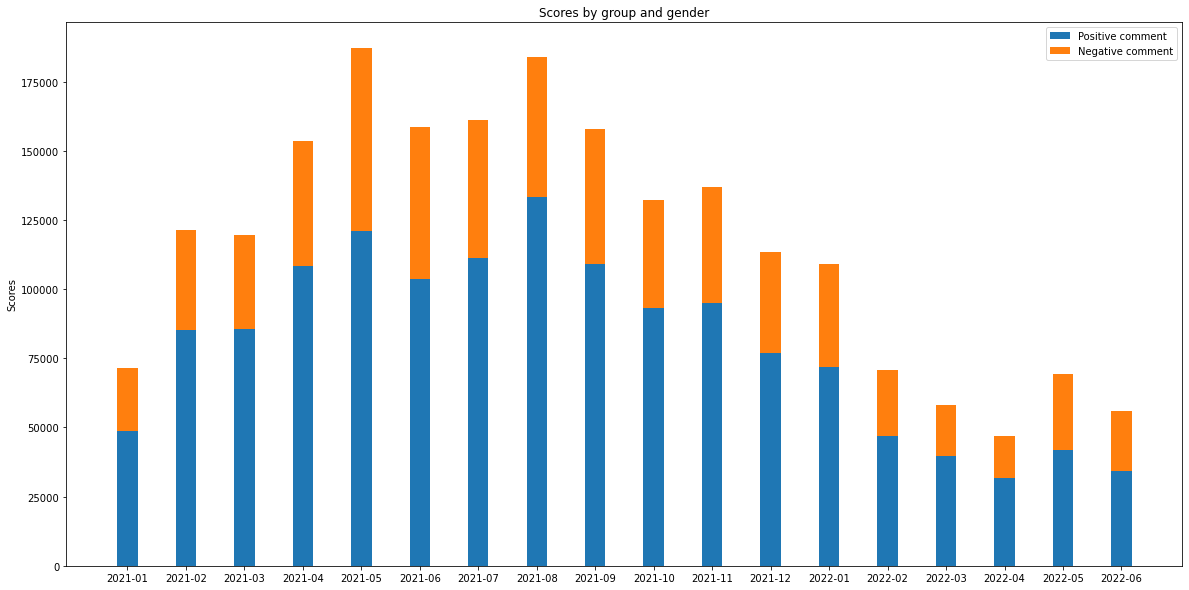

In [53]:
import matplotlib.pyplot as plt


labels = sum_f.index
men_means = sum_f.reddit_positive_cnt_l5m_vadar
women_means = sum_f.reddit_negative_cnt_l5m_vadar
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))
#fig = plt.figure()

ax.bar(labels, men_means, width, label='Positive comment')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Negative comment')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
plt.title(sym)
ax.plot(testdata[testdata.close_time.apply(lambda x:str(x[:4]+x[14:16]))=='202059']['spread']);


In [20]:
BTC3.columns

Index(['close_time', 'open', 'high', 'low', 'close', 'volume', 'asset_volume',
       'num_trades', 'taker_base_volume', 'taker_quote_volume', 'SMA_20',
       'SMA_60', 'RSI', 'log_ret', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd',
       'created_datetime_5m_x', 'reddit_cnt_l5m_x',
       'reddit_positive_cnt_l5m_flair', 'reddit_positive_ratio_l5m_flair',
       'reddit_negative_cnt_l5m_flair', 'reddit_negative_ratio_l5m_flair',
       'created_datetime_5m_y', 'reddit_cnt_l5m_y',
       'reddit_positive_cnt_l5m_vadar', 'reddit_positive_ratio_l5m_vadar',
       'reddit_negative_cnt_l5m_vadar', 'reddit_negative_ratio_l5m_vadar',
       'created_datetime_5m', 'reddit_cnt_l5m',
       'reddit_positive_cnt_l5m_transformer',
       'reddit_positive_ratio_l5m_transformer',
       'reddit_negative_cnt_l5m_transformer',
       'reddit_negative_ratio_l5m_transformer',
       'reddit_net_sentiment_cnt_l5m_flair',
       'reddit_net_sentiment_cnt_l5m_vadar',
       'reddit_net_sentiment_cnt_l5m_transf

In [21]:
BTC3[['reddit_positive_cnt_l5m_flair', 'reddit_negative_cnt_l5m_flair', 'reddit_cnt_l5m_x', 'reddit_net_sentiment_cnt_l5m_flair', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_flair,reddit_negative_cnt_l5m_flair,reddit_cnt_l5m_x,reddit_net_sentiment_cnt_l5m_flair,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_flair,1.000000,0.656380,0.876040,0.076317,0.165869,0.009422,0.025383,-0.010019,-0.014788,-0.025709,-0.025093
reddit_negative_cnt_l5m_flair,0.656380,1.000000,0.938831,-0.702137,0.069276,-0.001829,0.087135,0.037850,0.036518,0.033399,0.039440
reddit_cnt_l5m_x,0.876040,0.938831,1.000000,-0.413976,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_flair,0.076317,-0.702137,-0.413976,1.000000,0.064991,0.011310,-0.091205,-0.059481,-0.062224,-0.068414,-0.075817
close,0.165869,0.069276,0.119997,0.064991,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.009422,-0.001829,0.003132,0.011310,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.025383,0.087135,0.067284,-0.091205,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,-0.010019,0.037850,0.019621,-0.059481,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,-0.014788,0.036518,0.016592,-0.062224,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.025709,0.033399,0.009612,-0.068414,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [22]:
BTC3[['reddit_positive_cnt_l5m_vadar', 'reddit_negative_cnt_l5m_vadar', 'reddit_cnt_l5m_y', 'reddit_net_sentiment_cnt_l5m_vadar', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_vadar,reddit_negative_cnt_l5m_vadar,reddit_cnt_l5m_y,reddit_net_sentiment_cnt_l5m_vadar,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_vadar,1.000000,0.573389,0.880498,0.727511,0.163007,0.006214,0.040824,0.010339,0.007811,-0.001345,-0.001323
reddit_negative_cnt_l5m_vadar,0.573389,1.000000,0.792746,-0.144960,0.008642,-0.003674,0.100182,0.054855,0.055168,0.054663,0.064106
reddit_cnt_l5m_y,0.880498,0.792746,1.000000,0.399493,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_vadar,0.727511,-0.144960,0.399493,1.000000,0.189624,0.010581,-0.034594,-0.033451,-0.036768,-0.047407,-0.055298
close,0.163007,0.008642,0.119997,0.189624,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.006214,-0.003674,0.003132,0.010581,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.040824,0.100182,0.067284,-0.034594,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,0.010339,0.054855,0.019621,-0.033451,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,0.007811,0.055168,0.016592,-0.036768,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.001345,0.054663,0.009612,-0.047407,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [23]:
BTC3[['reddit_positive_cnt_l5m_transformer', 'reddit_negative_cnt_l5m_transformer', 'reddit_cnt_l5m_y', 'reddit_net_sentiment_cnt_l5m_transformer', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_cnt_l5m_y,reddit_net_sentiment_cnt_l5m_transformer,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_transformer,1.000000,0.639679,0.834109,-0.150543,0.153735,0.008683,0.025180,-0.013316,-0.020384,-0.031538,-0.031514
reddit_negative_cnt_l5m_transformer,0.639679,1.000000,0.957545,-0.856181,0.086866,-0.000174,0.080600,0.034300,0.033774,0.029878,0.035640
reddit_cnt_l5m_y,0.834109,0.957545,1.000000,-0.670883,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_transformer,-0.150543,-0.856181,-0.670883,1.000000,-0.008385,0.006061,-0.086739,-0.053067,-0.057144,-0.059634,-0.067028
close,0.153735,0.086866,0.119997,-0.008385,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.008683,-0.000174,0.003132,0.006061,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.025180,0.080600,0.067284,-0.086739,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,-0.013316,0.034300,0.019621,-0.053067,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,-0.020384,0.033774,0.016592,-0.057144,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.031538,0.029878,0.009612,-0.059634,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [20]:
BTC3.drop(BTC3.columns[[i for i in range(1,18)]],axis=1).to_csv("redditSentiment_5m_sum1.csv")
testBTC3.drop(BTC3.columns[[i for i in range(1,18)]],axis=1).to_csv("redditSentiment_5m_sum2.csv")

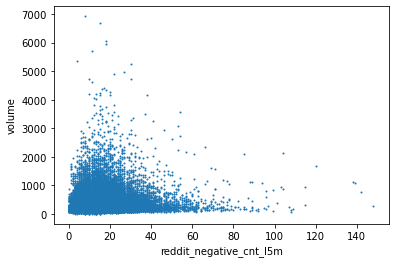

In [26]:
BTC3.plot.scatter(x = 'reddit_negative_cnt_l5m', y = 'volume', s = 1);

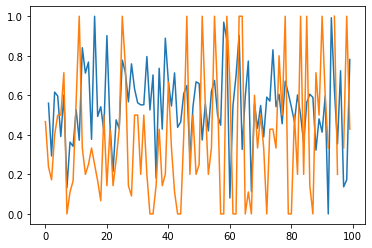

In [62]:
plt.plot(scaler.fit_transform(BTC3[['log_ret','inclined_sentiment_l5m']].head(100)))

In [21]:
BTC3[['close_time','reddit_cnt_l5m','reddit_positive_cnt_l5m','reddit_negative_cnt_l5m']]#.to_csv('reddit_train.csv')

,close_time,reddit_cnt_l5m,reddit_positive_cnt_l5m,reddit_negative_cnt_l5m
0,2021-01-01 00:04:59.999,15.0,11.0,4.0
1,2021-01-01 00:09:59.999,21.0,8.0,13.0
2,2021-01-01 00:14:59.999,29.0,17.0,12.0
3,2021-01-01 00:19:59.999,10.0,7.0,3.0
4,2021-01-01 00:24:59.999,4.0,3.0,1.0
...,...,...,...,...
52004,2021-06-30 23:39:59.999,22.0,11.0,11.0
52005,2021-06-30 23:44:59.999,27.0,12.0,15.0
52006,2021-06-30 23:49:59.999,16.0,5.0,11.0
52007,2021-06-30 23:54:59.999,20.0,11.0,9.0


In [22]:
testBTC3[['close_time','reddit_cnt_l5m','reddit_positive_cnt_l5m','reddit_negative_cnt_l5m']]#.to_csv('reddit_test.csv')

,close_time,reddit_cnt_l5m,reddit_positive_cnt_l5m,reddit_negative_cnt_l5m
0,2021-07-01 00:04:59.999,75.0,48.0,27.0
1,2021-07-01 00:09:59.999,42.0,24.0,18.0
2,2021-07-01 00:14:59.999,40.0,21.0,19.0
3,2021-07-01 00:19:59.999,37.0,15.0,22.0
4,2021-07-01 00:24:59.999,28.0,12.0,16.0
...,...,...,...,...
104846,2022-06-30 07:44:59.999,12.0,5.0,7.0
104847,2022-06-30 07:49:59.999,10.0,2.0,8.0
104848,2022-06-30 07:54:59.999,10.0,5.0,5.0
104849,2022-06-30 07:59:59.999,14.0,5.0,9.0


In [91]:
import twint
import nest_asyncio
import pandas as pd
import textwrap

# Useful Libraries
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS


In [13]:
redditDataTrain_vadar.sort_values('compound',ascending=True).body

2857    If you need help, don't hesitate to contact th...
1099    American people panicking over 7% inflation\n\...
4609    I’m getting the navy seal copypasta vibes from...
922     No one:\n\nAbsolutely no one:\n\nMarket: drops...
6917                                        😱😱😱😱😱😱😱😱😱😱😱😱😱
                              ...                        
9471    Alright Alright Alright Alright Alright Alrigh...
1025    Are you going to lose money tomorrow and beyon...
583     Will your portfolio go up this weekend? Pop on...
7118    Did you see the post earlier outside of the da...
6814    What's that shitcoin?\n\nGonna secure some bag...
Name: body, Length: 3393131, dtype: object

In [23]:
mask = (redditDataTrain_vadar['score']>30) & (redditDataTrain_vadar['body'].str.len() <= 100)
redditDataTrain_vadar.loc[mask].sort_values('compound',ascending=True)

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,compound,sentiment
2,104,"Literally 2 days ago ""holy fuck 42k this is ba...",1.621559e+09,2021-05-21,00:55:55,2021-05-21 00:55:55,2021-05-21 00:59:59.999,2021-05-21 00:59:59.999,2021-05-21 00:59:59.999,-0.8885,NEGATIVE
4446,32,They're price gauging electricity during this ...,1.613961e+09,2021-02-22,02:24:38,2021-02-22 02:24:38,2021-02-22 02:24:59.999,2021-02-22 02:29:59.999,2021-02-22 02:59:59.999,-0.8836,NEGATIVE
245,58,This stupid ass coin is going to crash the market,1.618537e+09,2021-04-16,01:31:53,2021-04-16 01:31:53,2021-04-16 01:34:59.999,2021-04-16 01:59:59.999,2021-04-16 01:59:59.999,-0.8625,NEGATIVE
6,48,Pet died in the night and the markets red this...,1.613985e+09,2021-02-22,09:12:54,2021-02-22 09:12:54,2021-02-22 09:14:59.999,2021-02-22 09:29:59.999,2021-02-22 09:59:59.999,-0.8519,NEGATIVE
4,53,Buy the dip!!\n\nWith what...? Im broke mother...,1.620894e+09,2021-05-13,08:15:19,2021-05-13 08:15:19,2021-05-13 08:19:59.999,2021-05-13 08:29:59.999,2021-05-13 08:59:59.999,-0.8510,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...
22,39,Hope everyone has a great day. Bought my first...,1.630628e+09,2021-09-03,00:07:17,2021-09-03 00:07:17,2021-09-03 00:09:59.999,2021-09-03 00:29:59.999,2021-09-03 00:59:59.999,0.8750,POSITIVE
62,35,"If you see this comment, I hope you have a gre...",1.614731e+09,2021-03-03,00:24:40,2021-03-03 00:24:40,2021-03-03 00:24:59.999,2021-03-03 00:29:59.999,2021-03-03 00:59:59.999,0.8750,POSITIVE
3,45,Team ALGO 💚💚💚 Let’s hit $1.30 soon 🆙,1.619488e+09,2021-04-27,01:42:10,2021-04-27 01:42:10,2021-04-27 01:44:59.999,2021-04-27 01:59:59.999,2021-04-27 01:59:59.999,0.9312,POSITIVE
172,31,I’m in such a happy mood 😁\n\nUpvotes for all ...,1.618447e+09,2021-04-15,00:28:23,2021-04-15 00:28:23,2021-04-15 00:29:59.999,2021-04-15 00:29:59.999,2021-04-15 00:59:59.999,0.9442,POSITIVE


In [93]:
# Show random tweets
def show_random_tweets(df, N=3):

  if(N > len(df)):
    N = 3

  for i in range(N):
    row = df.iloc[i]
    print("Predicted Sentiment: {}".format(row["sentiment"]))
    print("Created on: {}".format(row["created_datetime"]))
    print("Text: {}".format("\n".join(textwrap.wrap(row["body"], 
                                                     width=50))))
    print("\n")
    
    
mask = (redditDataTrain_vadar['score']>15) & (redditDataTrain_vadar['body'].str.len() <= 200)
    
show_random_tweets(redditDataTrain_vadar.loc[mask].sort_values('compound',ascending=True),500)

show_random_tweets(redditDataTrain_vadar.loc[mask].sort_values('compound',ascending=False),30)

Predicted Sentiment: NEGATIVE
Created on: 2021-02-19 13:21:01
Text: You know what. FUCK BNB, and fuck Binance the
greedy bastards.   First they suspend ADA, and now
Eth. Anyone who buys into this centralised
bullshit is hurting what crypto is all about.


Predicted Sentiment: NEGATIVE
Created on: 2021-05-17 22:02:23
Text: Fool me one dead cat bounce, shame on you. Fool me
25 dead cat bounces, I'm an idiot.


Predicted Sentiment: NEGATIVE
Created on: 2022-04-26 01:35:57
Text: I don't wanna be mean but i just want to shout
into the void; IF YOU LOSE YOUR STASH DUE TO A
DOUBLE YOUR BALANCE SCAM YOU'RE A DUMBASS!


Predicted Sentiment: NEGATIVE
Created on: 2021-05-28 22:06:49
Text: price drops: what the fuck is this bullshit what a
waste of money fuck crypto this shit is a scam and
we've all been fooled.  price increases: I just
love the tech!


Predicted Sentiment: NEGATIVE
Created on: 2021-11-10 12:25:50
Text: OMG guys I'm tearing up, just made a whole year
salary in LRC. At this rate I 

know shit about fuck.


Predicted Sentiment: NEGATIVE
Created on: 2021-02-23 05:47:28
Text: I just learned Daft Punk split up. I didn’t even
know because I’ve been watching the charts all
day. What a shit ass day


Predicted Sentiment: NEGATIVE
Created on: 2021-01-13 05:11:07
Text: This sub feels dead when btc is 33k  literally btc
was 33k 10 days ago and everyone was shitting
their pants


Predicted Sentiment: NEGATIVE
Created on: 2021-06-21 02:42:24
Text: fuck this shit, i'm going to watch starship
troopers.


Predicted Sentiment: NEGATIVE
Created on: 2021-05-17 00:03:04
Text: holy shit what a close  fuck Elon


Predicted Sentiment: NEGATIVE
Created on: 2021-02-16 17:21:41
Text: Why the panic wtf? We're holding above 48000 this
is insanely bullish


Predicted Sentiment: NEGATIVE
Created on: 2022-01-11 10:10:34
Text: This crash was worse than a divorce. I've lost
half of my portfolio and still have my wife


Predicted Sentiment: NEGATIVE
Created on: 2021-05-25 02:53:18
Text: I don’t k

Created on: 2021-11-22 01:05:58
Text: upgraded my bed with crypto profits but i
assembled the frame wrong and im too tired to re
do it so tonight i sleep on the floor.  update: i
did it. floor was fine.


Predicted Sentiment: NEGATIVE
Created on: 2021-11-18 16:34:47
Text: Funny how a lot of people load up when the market
is ripping to ATHs but do the opposite when
there’s a dip.  *buy at the high, sell at the low*
= terrible financial decision making


Predicted Sentiment: NEGATIVE
Created on: 2021-05-25 01:01:15
Text: i panic sold 2 days ago in profit and i really
wish i bought the dip i was scared.... now im so
depressed today.. feel like i messed up hard man


Predicted Sentiment: NEGATIVE
Created on: 2021-01-09 01:59:08
Text:  ETH doesn't seem to want to break that 1200
dollar wall.  Hell of a week, though.


Predicted Sentiment: NEGATIVE
Created on: 2021-04-21 00:06:58
Text: # HOLY FUCK, HE DID IT!  &#x200B;  # MONERO $420
on 4/20!


Predicted Sentiment: NEGATIVE
Created on: 2021-

In [92]:
show_random_tweets(redditDataTrain_vadar[redditDataTrain_vadar.created_date==datetime.date(2021, 12, 25)])

Predicted Sentiment: NEUTRAL
Created on: 2021-12-25 00:28:31
Text: get out! you're in the old daily!


Predicted Sentiment: POSITIVE
Created on: 2021-12-25 00:51:21
Text: Merry Christmas from Australia! It's going to be
43deg celsius where I am (109F). Enjoy your cold
Christmas 😉


Predicted Sentiment: POSITIVE
Created on: 2021-12-25 00:01:53
Text: Everyone one, just a quick question because google
isn't helping  Do you remember the japanese term
that roughly says  "Don't lose dollars gaining
cents" or something like that




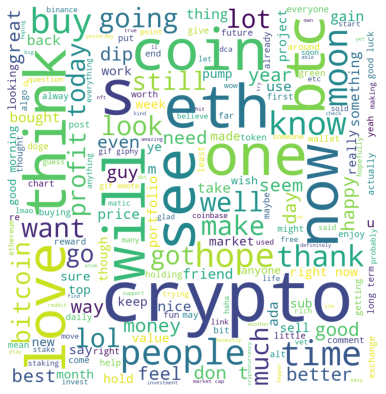

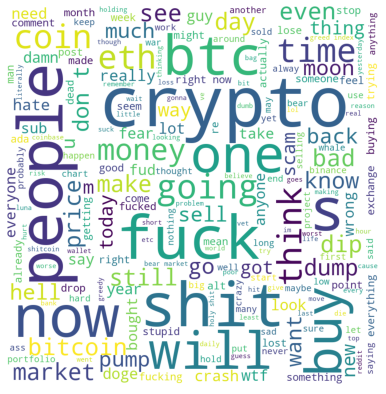

In [34]:
# Apply it to President Joe Biden Image and Tweets
# Implementation of the function
def show_word_cloud(df, img_mask_path, fig_size=(20, 7)):

  # Create the color mask
  img_color_mask = np.array(Image.open(img_mask_path))
  
  # Get all the text 
  text = df.body.tolist() 

  # join the list and lowercase all the words
  text = ' '.join(text).lower()

  #create the wordcloud object by 
  """
  - removing stopwords
  - changing the background color to white
  - using the image as final mask
  """
  wordcloud = WordCloud(stopwords = STOPWORDS, 
                        background_color='white',
                        mask = img_color_mask).generate(text)

  # Configure for a bigger image size
  plt.figure(figsize = fig_size)
  plt.axis('off')
  plt.imshow(wordcloud)
bide_img_path = "joeBiden.png"

mask = (redditDataTrain_vadar['score']>-1) & (redditDataTrain_vadar['compound']>0.7)

show_word_cloud(redditDataTrain_vadar.loc[mask], bide_img_path)

mask = (redditDataTrain_vadar['score']>-1) & (redditDataTrain_vadar['compound']<-0.7)

show_word_cloud(redditDataTrain_vadar.loc[mask], bide_img_path)

In [11]:
redditDataTrain_vadar['created_datetime_1d'] = redditDataTrain_vadar.created_date.apply(lambda x:str(x)+' 23:59:59.999')
redditDataTrain_vadar

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,compound,sentiment,created_datetime_1d
613,1,"I'm sorry, but I set a reminder, and this hurt...",1.609451e+09,2020-12-31,21:41:44,2020-12-31 21:41:44,2020-12-31 21:44:59.999,2020-12-31 21:59:59.999,2020-12-31 21:59:59.999,-0.7259,NEGATIVE,2020-12-31 23:59:59.999
720,1,Unlikely,1.612948e+09,2021-02-10,09:06:05,2021-02-10 09:06:05,2021-02-10 09:09:59.999,2021-02-10 09:29:59.999,2021-02-10 09:59:59.999,0.0000,NEUTRAL,2021-02-10 23:59:59.999
1052,2,Thank you (sincerely) -- this comment saved me...,1.609866e+09,2021-01-05,17:04:34,2021-01-05 17:04:34,2021-01-05 17:04:59.999,2021-01-05 17:29:59.999,2021-01-05 17:59:59.999,0.8126,POSITIVE,2021-01-05 23:59:59.999
1210,2,Cheers. Happy to be helpful.,1.609868e+09,2021-01-05,17:38:03,2021-01-05 17:38:03,2021-01-05 17:39:59.999,2021-01-05 17:59:59.999,2021-01-05 17:59:59.999,0.8625,POSITIVE,2021-01-05 23:59:59.999
2857,2,Thank you! Very cool of you. I also managed to...,1.609389e+09,2020-12-31,04:25:04,2020-12-31 04:25:04,2020-12-31 04:29:59.999,2020-12-31 04:29:59.999,2020-12-31 04:59:59.999,0.6885,POSITIVE,2020-12-31 23:59:59.999
...,...,...,...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999,0.0000,NEUTRAL,2022-05-09 23:59:59.999
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999,0.8911,POSITIVE,2022-05-10 23:59:59.999
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999,0.7184,POSITIVE,2022-05-09 23:59:59.999
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,-0.4019,NEGATIVE,2022-05-09 23:59:59.999


In [18]:
g = '2020-12-31 00:04:59.999'

def string_plus_time(g,pt=datetime.timedelta(minutes=5)):
    return str(datetime.datetime.strptime(g[:19], "%Y-%m-%d %H:%M:%S") + pt) + '.999'
string_plus_time(g)

'2020-12-31 00:09:59.999'

In [20]:
reddit_cnt1b

,created_datetime_5m,reddit_cnt_l5m,reddit_positive_cnt_l5m_vadar,reddit_positive_ratio_l5m_vadar,reddit_negative_cnt_l5m_vadar,reddit_negative_ratio_l5m_vadar
0,2020-12-31 00:04:59.999,31,8,0.258065,5,0.161290
1,2020-12-31 00:09:59.999,24,8,0.333333,3,0.125000
2,2020-12-31 00:14:59.999,29,10,0.344828,3,0.103448
3,2020-12-31 00:19:59.999,23,9,0.391304,3,0.130435
4,2020-12-31 00:24:59.999,29,12,0.413793,6,0.206897
...,...,...,...,...,...,...
156570,2022-07-01 13:59:59.999,1,0,0.000000,0,0.000000
156571,2022-07-01 15:49:59.999,1,1,1.000000,0,0.000000
156572,2022-07-01 16:04:59.999,1,1,1.000000,0,0.000000
156573,2022-07-01 18:19:59.999,1,1,1.000000,0,0.000000


In [8]:
priceData=BTC.append(testBTC)

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\847373067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  priceData=BTC.append(testBTC)


In [40]:
key='created_datetime_5m'
reddit_cnt1b = redditDataTrain_vadar[[key,'sentiment']].pivot_table(index=key, aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1b.columns = [key,'reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_positive_ratio_l5m_vadar','reddit_negative_cnt_l5m_vadar','reddit_negative_ratio_l5m_vadar']

results=[]
for i in range(-20,20):
    priceDataJ1 = priceData[['close_time','close']]
    priceDataJ2 = priceData[['close_time','close']]
    priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
    priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
    priceDataJ1.columns = ['close_time','close1']
    priceDataJ2.columns = ['close_time','close2']
    reddit_cnt1b_cor = reddit_cnt1b.merge(
        priceDataJ1,left_on=key,right_on='close_time').merge(
        priceDataJ2,left_on=key,right_on='close_time')
    reddit_cnt1b_cor['price_pct_change'] = (reddit_cnt1b_cor.close2-reddit_cnt1b_cor.close1)/reddit_cnt1b_cor.close1

    results.append(('percentage change for price from '+ str(i*5) + ' minute to '+ str((i+1)*5)+' minute',
                    reddit_cnt1b_cor[['reddit_positive_ratio_l5m_vadar','price_pct_change']].corr().values.tolist()[0][1]
                   ))

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\3280208630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*5)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

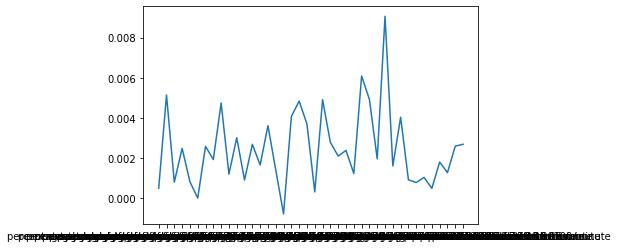

In [41]:
plt.plot(pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0]))

In [42]:
pd.DataFrame(results).to_csv('lag5m.csv')

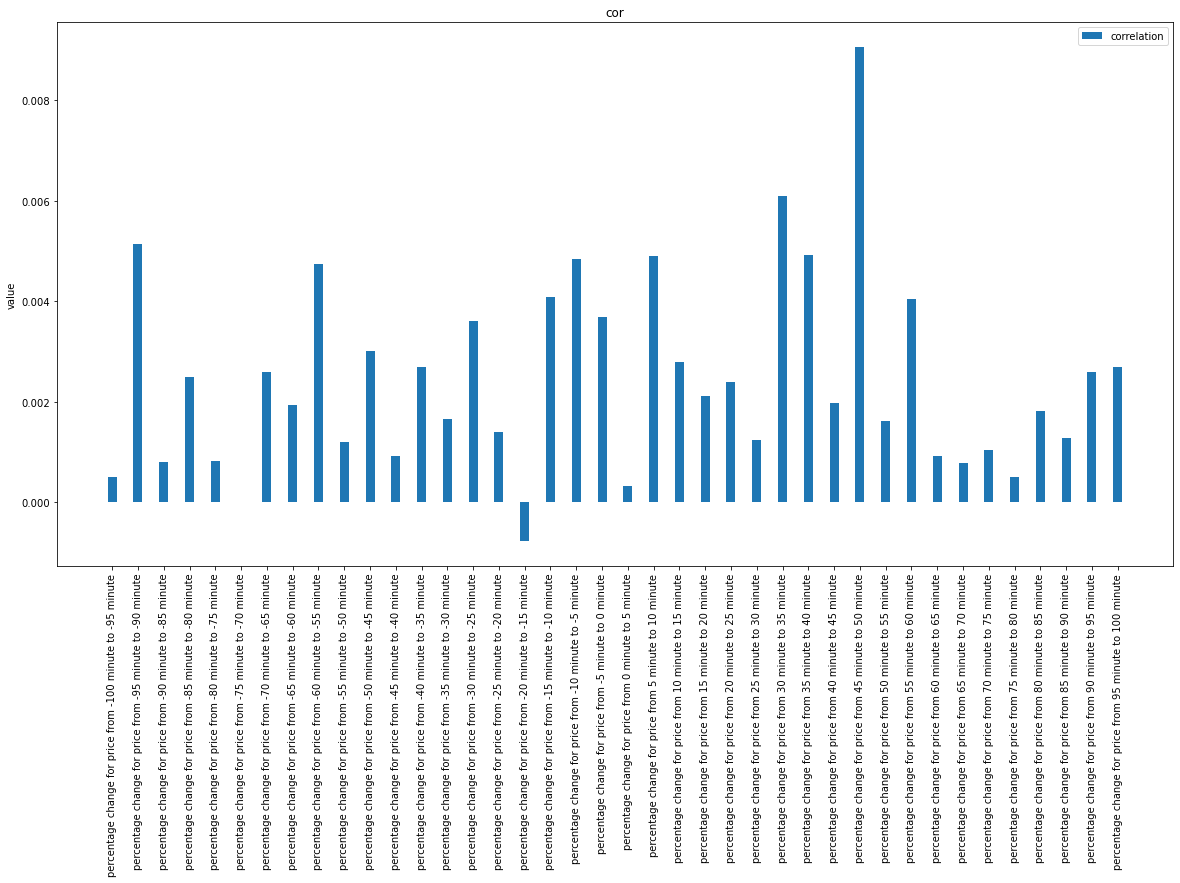

In [43]:
import matplotlib.pyplot as plt


labels = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0]).index
men_means = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0])[1]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))
#fig = plt.figure()

ax.bar(labels, men_means, width, label='correlation')
plt.xticks(rotation=90)

ax.set_ylabel('value')
ax.set_title('cor')
ax.legend()

plt.show()

In [44]:
reddit_cnt1b_cor.shape

(155850, 11)

In [45]:
key='created_datetime_60m'
reddit_cnt1b = redditDataTrain_vadar[[key,'sentiment']].pivot_table(index=key, aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1b.columns = [key,'reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_positive_ratio_l5m_vadar','reddit_negative_cnt_l5m_vadar','reddit_negative_ratio_l5m_vadar']

results=[]
for i in range(-20,20):
    priceDataJ1 = priceData[['close_time','close']]
    priceDataJ2 = priceData[['close_time','close']]
    priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
    priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
    priceDataJ1.columns = ['close_time','close1']
    priceDataJ2.columns = ['close_time','close2']
    reddit_cnt1b_cor = reddit_cnt1b.merge(
        priceDataJ1,left_on=key,right_on='close_time').merge(
        priceDataJ2,left_on=key,right_on='close_time')
    reddit_cnt1b_cor['price_pct_change'] = (reddit_cnt1b_cor.close2-reddit_cnt1b_cor.close1)/reddit_cnt1b_cor.close1

    results.append(('percentage change for price from '+ str(i) + ' hour to '+ str((i+1))+' hour',
                    reddit_cnt1b_cor[['reddit_positive_ratio_l5m_vadar','price_pct_change']].corr().values.tolist()[0][1]
                   ))

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-i*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\967928494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(minutes=-(i+1)*60)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_147

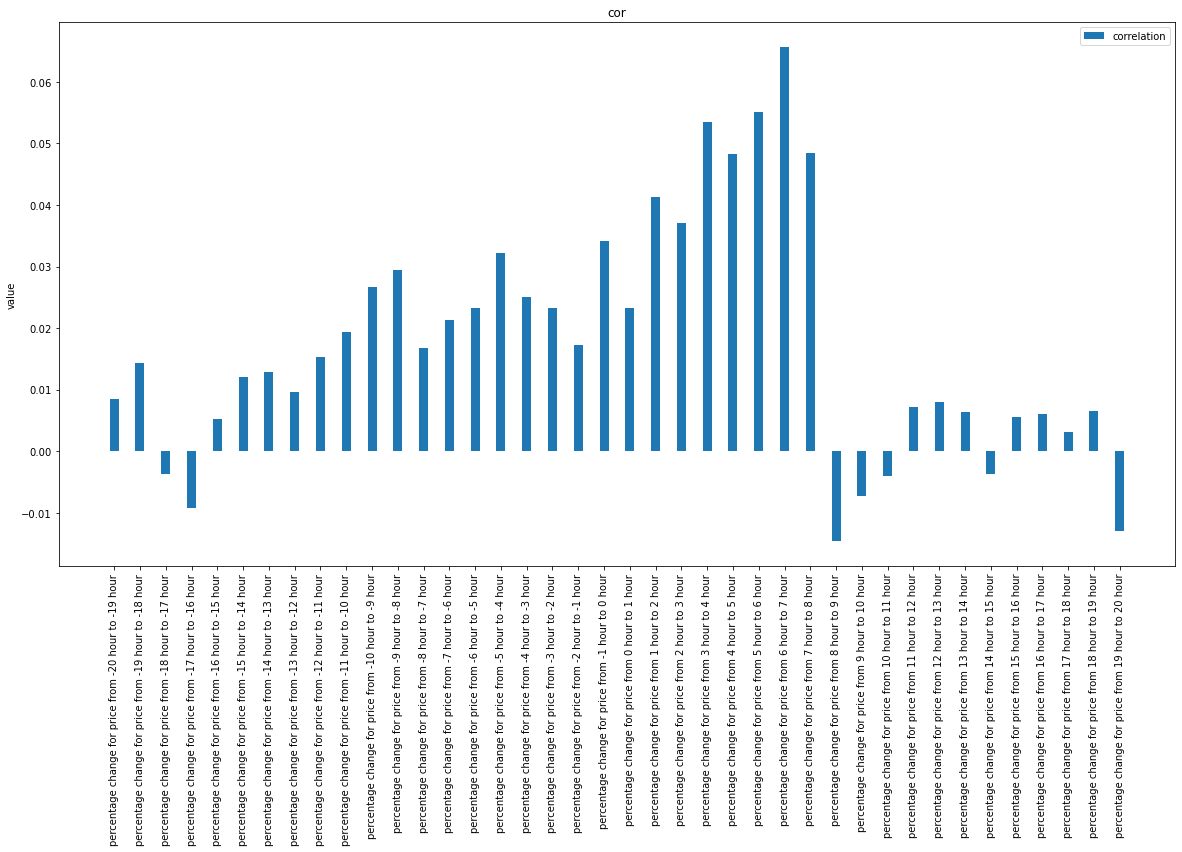

In [46]:
import matplotlib.pyplot as plt


labels = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0]).index
men_means = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0])[1]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))
#fig = plt.figure()

ax.bar(labels, men_means, width, label='correlation')
plt.xticks(rotation=90)

ax.set_ylabel('value')
ax.set_title('cor')
ax.legend()

plt.show()

In [47]:
reddit_cnt1b_cor.shape

(13008, 11)

In [48]:
pd.DataFrame(results).to_csv('lag60m.csv')

In [49]:
key='created_datetime_1d'
reddit_cnt1b = redditDataTrain_vadar[[key,'sentiment']].pivot_table(index=key, aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1b.columns = [key,'reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_positive_ratio_l5m_vadar','reddit_negative_cnt_l5m_vadar','reddit_negative_ratio_l5m_vadar']

results=[]
for i in range(-20,20):
    priceDataJ1 = priceData[['close_time','close']]
    priceDataJ2 = priceData[['close_time','close']]
    priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
    priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
    priceDataJ1.columns = ['close_time','close1']
    priceDataJ2.columns = ['close_time','close2']
    reddit_cnt1b_cor = reddit_cnt1b.merge(
        priceDataJ1,left_on=key,right_on='close_time').merge(
        priceDataJ2,left_on=key,right_on='close_time')
    reddit_cnt1b_cor['price_pct_change'] = (reddit_cnt1b_cor.close2-reddit_cnt1b_cor.close1)/reddit_cnt1b_cor.close1

    results.append(('percentage change for price from '+ str(i) + ' day to '+ str((i+1))+' day',
                    reddit_cnt1b_cor[['reddit_positive_ratio_l5m_vadar','price_pct_change']].corr().values.tolist()[0][1]
                   ))

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\427

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\427

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\427

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\427

C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ1.close_time = priceDataJ1.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-i*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\4276422650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceDataJ2.close_time = priceDataJ2.close_time.apply(lambda x:string_plus_time(x,datetime.timedelta(days=-(i+1)*1)))
C:\Users\ricky\AppData\Local\Temp\ipykernel_14776\427

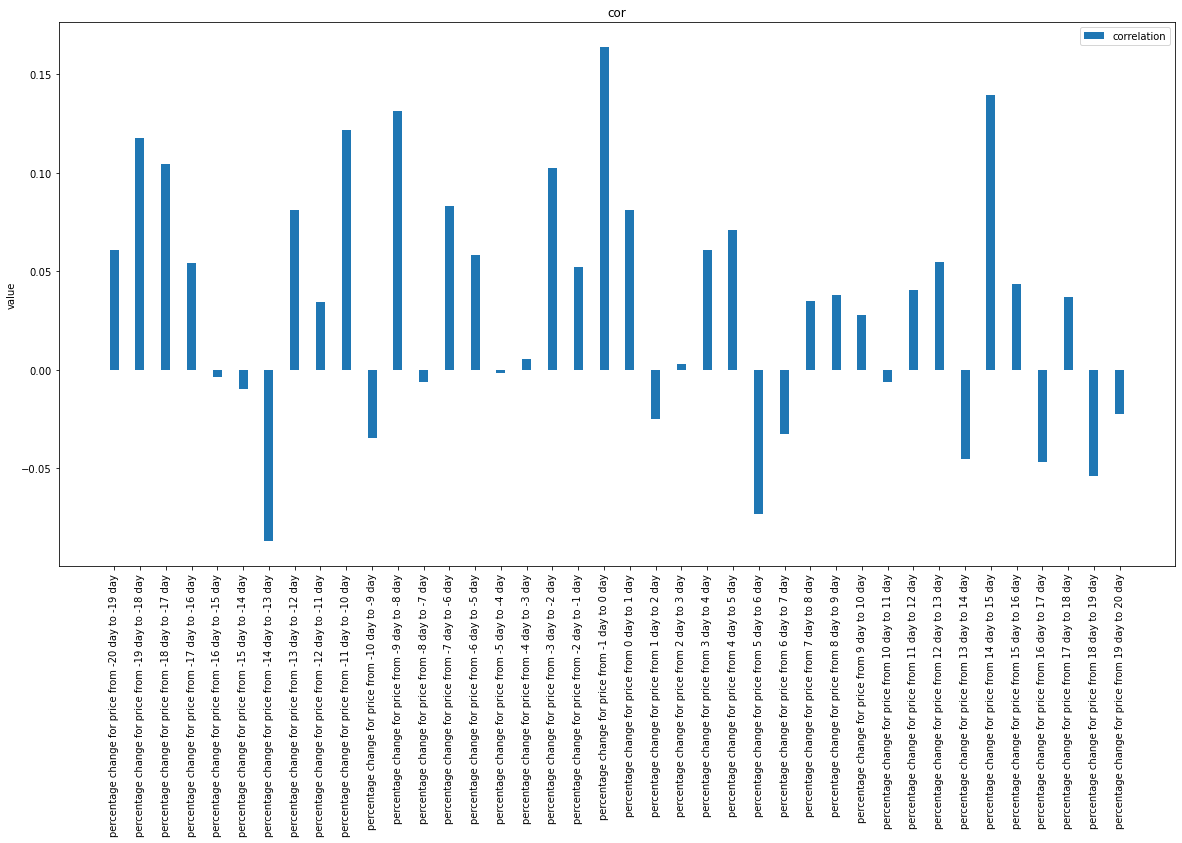

In [50]:
import matplotlib.pyplot as plt


labels = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0]).index
men_means = pd.DataFrame(results).set_index(pd.DataFrame(results).columns[0])[1]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20,10))
#fig = plt.figure()

ax.bar(labels, men_means, width, label='correlation')
plt.xticks(rotation=90)

ax.set_ylabel('value')
ax.set_title('cor')
ax.legend()

plt.show()

In [51]:
reddit_cnt1b_cor.shape

(526, 11)

In [52]:
pd.DataFrame(results).to_csv('lag1d.csv')

In [53]:
reddit_cnt1b_cor

,created_datetime_1d,reddit_cnt_l5m,reddit_positive_cnt_l5m_vadar,reddit_positive_ratio_l5m_vadar,reddit_negative_cnt_l5m_vadar,reddit_negative_ratio_l5m_vadar,close_time_x,close1,close_time_y,close2,price_pct_change
0,2020-12-31 23:59:59.999,2765,1208,0.436890,528,0.190958,2020-12-31 23:59:59.999,37329.40,2020-12-31 23:59:59.999,34192.17,-0.084042
1,2021-01-01 23:59:59.999,2186,982,0.449222,429,0.196249,2021-01-01 23:59:59.999,34192.17,2021-01-01 23:59:59.999,31384.09,-0.082126
2,2021-01-02 23:59:59.999,3775,1498,0.396821,767,0.203179,2021-01-02 23:59:59.999,31384.09,2021-01-02 23:59:59.999,32458.42,0.034232
3,2021-01-03 23:59:59.999,4938,1914,0.387606,876,0.177400,2021-01-03 23:59:59.999,32458.42,2021-01-03 23:59:59.999,31877.10,-0.017910
4,2021-01-04 23:59:59.999,4320,1859,0.430324,777,0.179861,2021-01-04 23:59:59.999,31877.10,2021-01-04 23:59:59.999,31957.05,0.002508
...,...,...,...,...,...,...,...,...,...,...,...
521,2022-06-05 23:59:59.999,1884,757,0.401805,422,0.223992,2022-06-05 23:59:59.999,20884.17,2022-06-05 23:59:59.999,20961.89,0.003721
522,2022-06-06 23:59:59.999,2346,991,0.422421,572,0.243819,2022-06-06 23:59:59.999,20961.89,2022-06-06 23:59:59.999,21326.11,0.017375
523,2022-06-07 23:59:59.999,2627,1100,0.418729,678,0.258089,2022-06-07 23:59:59.999,21326.11,2022-06-07 23:59:59.999,20754.73,-0.026793
524,2022-06-08 23:59:59.999,2281,1039,0.455502,499,0.218764,2022-06-08 23:59:59.999,20754.73,2022-06-08 23:59:59.999,20606.40,-0.007147


In [38]:
priceDataJ1

,close_time,close1
0,2021-01-01 19:04:59.999,28715.11
1,2021-01-01 19:09:59.999,28719.85
2,2021-01-01 19:14:59.999,28648.53
3,2021-01-01 19:19:59.999,28669.24
4,2021-01-01 19:24:59.999,28684.40
...,...,...
104846,2022-07-01 02:44:59.999,20084.13
104847,2022-07-01 02:49:59.999,20104.68
104848,2022-07-01 02:54:59.999,20104.78
104849,2022-07-01 02:59:59.999,20123.01


In [39]:
priceDataJ2

,close_time,close2
0,2021-01-01 20:04:59.999,28715.11
1,2021-01-01 20:09:59.999,28719.85
2,2021-01-01 20:14:59.999,28648.53
3,2021-01-01 20:19:59.999,28669.24
4,2021-01-01 20:24:59.999,28684.40
...,...,...
104846,2022-07-01 03:44:59.999,20084.13
104847,2022-07-01 03:49:59.999,20104.68
104848,2022-07-01 03:54:59.999,20104.78
104849,2022-07-01 03:59:59.999,20123.01
